In [1]:
import os
import json

import pandas as pd
import mlflow
import mlflow.sklearn


DATA_DIR = "../data"
DATA_DUMP_DIR = "../data_dump"

# Set tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")  

model = mlflow.sklearn.load_model('models:/m-bdd009808a514c93b18686fe1905001b')

C:\Users\flis1\AppData\Local\miniconda3\envs\stratifyHF\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv(os.path.join(DATA_DIR, "processed", "classification.csv"), index_col=0)
top_10_container = json.load(open(os.path.join(DATA_DUMP_DIR, "top_10.json")))["patid"]

In [3]:
X = data.loc[data.index.intersection(top_10_container), model.feature_names_in_]
imputed_X = pd.DataFrame(model["imputer"].transform(X), columns=model["imputer"].get_feature_names_out(), index=X.index)

940700620508
Phy_Sex           Male
Phy_Age          86.14
days_to_event      607
death_patient        0
Name: 940700620508, dtype: object


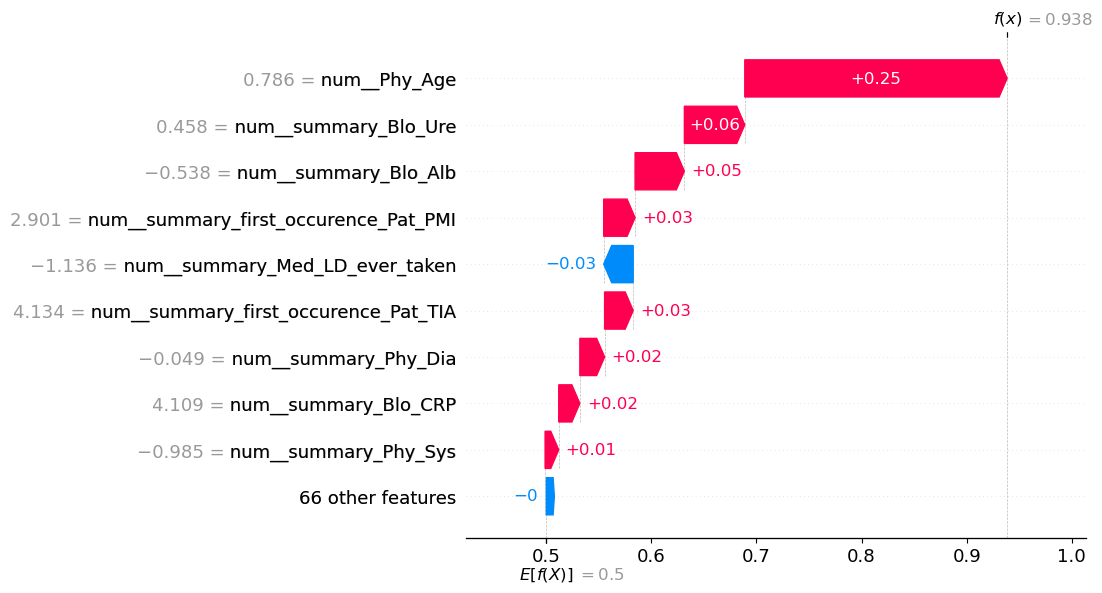

In [4]:
import shap

explainer = shap.TreeExplainer(model["model"])
shap_values = explainer(imputed_X)

i = 1
print(X.index[i])
print(data.loc[X.index[i], ['Phy_Sex', 'Phy_Age', 'days_to_event', 'death_patient']])

shap.waterfall_plot(shap_values[i,: , 1])

In [5]:
imputed_X

,num__summary_Blo_Alb,num__summary_Blo_CRP,num__summary_Blo_Cal,num__summary_Blo_Cre,num__summary_Blo_HBA1C,num__summary_Blo_Hb,num__summary_Blo_Pot,num__summary_Blo_Sod,num__summary_Blo_TSH,num__summary_Blo_TotC,...,cat__summary_Pat_AF_Y,cat__summary_Pat_DM_Y,cat__summary_Pat_COPD_Y,cat__summary_Pat_Chr_Y,cat__summary_Pat_Tub_Y,cat__summary_Pat_NS_Y,cat__summary_Pat_ES_Y,cat__summary_Pat_AST_Y,cat__summary_Pat_CS_Y,cat__Phy_Sex_Male
patid,,,,,,,,,,,,,,,,,,,,,
46533220088,0.097327,0.963833,-0.149802,1.605997,-1.297830,-0.732345,-0.095368,-2.084298,-0.589018,-0.121110,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
940700620508,-0.538230,4.109499,-0.003429,-0.152748,-0.117884,0.729370,-0.143022,0.086012,-0.176923,-0.019726,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
